In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  datetime import datetime

In [2]:
df= pd.read_excel('C:/Users/Mayank/Downloads/superstore_sales.xlsx')    
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


## Get the no. of rows and columns ##

In [3]:
df.shape

(51290, 21)

## count the no. of missing value ##

In [4]:
df.isnull().sum() 

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

## which are the most selling product ##

In [5]:
boughts = df.groupby ('product_name').agg({'quantity':'sum'}).sort_values('quantity',ascending= False).head(10)
boughts

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

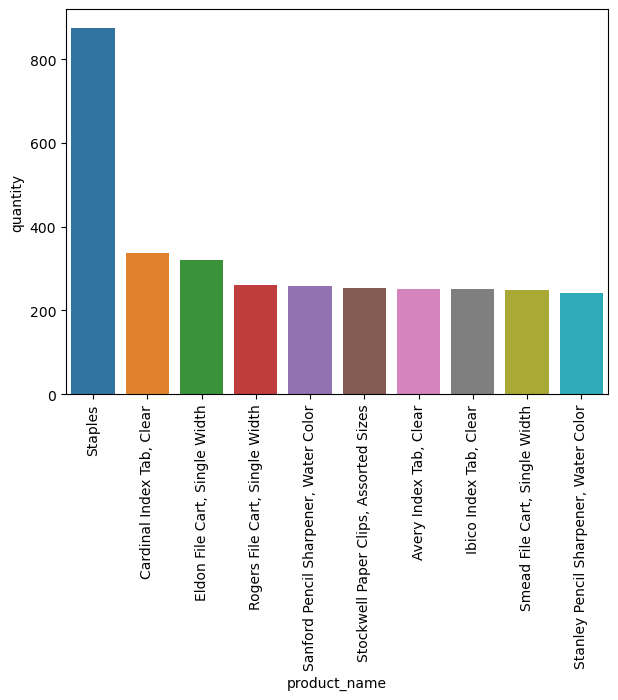

In [6]:
plt.figure(figsize=(7,5))
sns.barplot(x='product_name',y='quantity',data= boughts.reset_index())
plt.xticks(rotation='vertical')

## Which are the Top 10 products by sales ##

In [7]:
productsales =df.groupby ('product_name').agg({'sales':'sum'}).sort_values('sales',ascending= False).head(10)
productsales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


##  Which are the most profitable products ##

In [8]:
profitable_product = df.groupby ('product_name').agg({'profit':sum}).sort_values('profit',ascending= False).head()
profitable_product

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730


<Figure size 700x500 with 0 Axes>

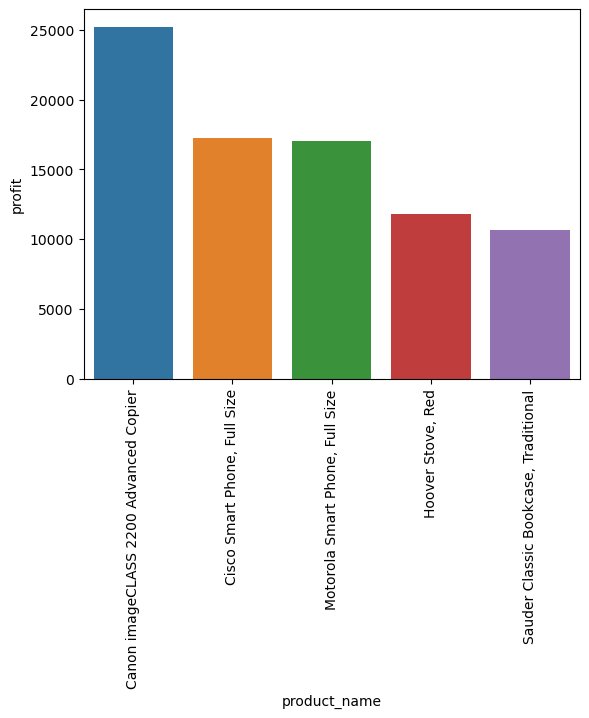

<Figure size 700x500 with 0 Axes>

In [9]:
sns.barplot(x='product_name',y= 'profit',data=profitable_product.reset_index())
plt.xticks(rotation='vertical')
plt.figure(figsize=(7,5))

## What category sold the most by quantity ##

In [10]:
category_sold=df.groupby('category').agg({'quantity':sum}).sort_values('quantity',ascending=False)
category_sold

,quantity
category,
Office Supplies,108182
Technology,35176
Furniture,34954


<Figure size 700x500 with 0 Axes>

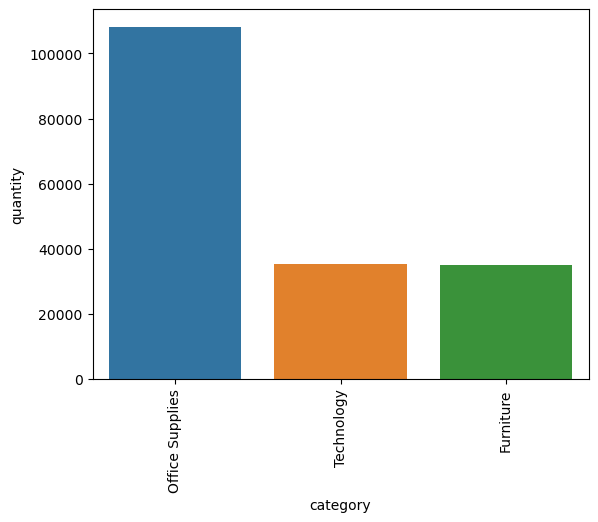

<Figure size 700x500 with 0 Axes>

In [11]:
sns.barplot(x='category',y= 'quantity',data=category_sold.reset_index())
plt.xticks(rotation='vertical')
plt.figure(figsize=(7,5))

##  Which are the most profitable category ##

In [12]:
profitablecategory= df.groupby('category').agg({'profit':sum}).sort_values('profit',ascending=False)
profitablecategory

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


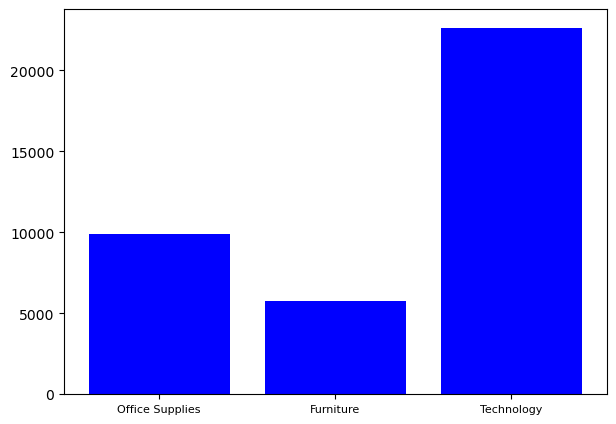

In [13]:
plt.figure(figsize=(7, 5))
plt.bar(df['category'],df['sales'],color = 'b')
plt.xticks(size=8)
plt.show()


##  Total sales values by category and subcategory ##

In [14]:
df.groupby(['category','sub_category']).agg({'sales':sum}).sort_values('category',ascending=False)

sales
category        sub_category              
Technology      Phones        1.706824e+06
                Machines      7.790601e+05
                Copiers       1.509436e+06
                Accessories   7.492370e+05
Office Supplies Labels        7.340403e+04
                Supplies      2.430742e+05
                Storage       1.127086e+06
                Paper         2.442917e+05
                Fasteners     8.324232e+04
                Envelopes     1.709043e+05
                Binders       4.619115e+05
                Art           3.720920e+05
                Appliances    1.011064e+06
Furniture       Chairs        1.501682e+06
                Tables        7.570419e+05
                Furnishings   3.855783e+05
                Bookcases     1.466572e+06

##  Which are the most selling products in subcategory ##

In [15]:
df.groupby(['category','sub_category'],as_index = False)["quantity"].count()

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


##  Which customer segments are the most profitable ##

In [16]:
profitable_segment = df.groupby('segment').agg({'profit':sum}).sort_values('profit',ascending=False)
profitable_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


<AxesSubplot:xlabel='profit', ylabel='segment'>

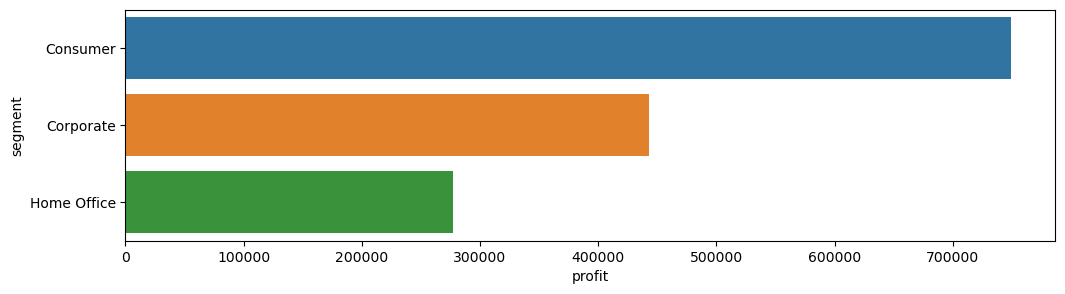

In [17]:
plt.figure(figsize=(12, 3))
sns.barplot(x= 'profit',y='segment',data =profitable_segment.reset_index())



## What shipping modes sold the most products ##

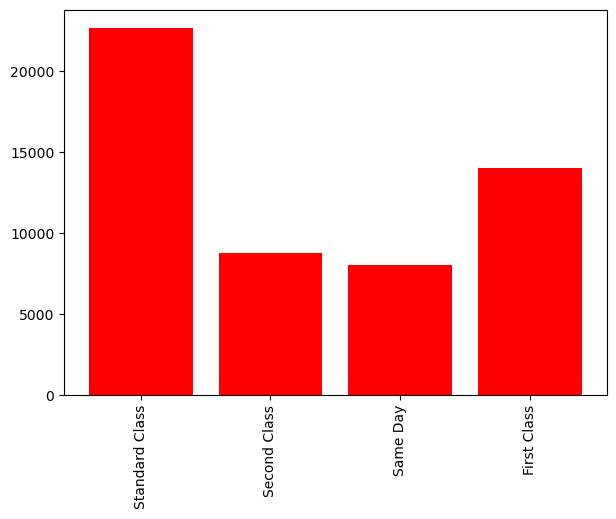

In [18]:
plt.figure(figsize=(7,5))
plt.bar(df['ship_mode'],df['sales'],color = 'r')
plt.xticks(rotation='vertical')
plt.show()


##  What market sold the most products ##

<AxesSubplot:xlabel='market', ylabel='quantity'>

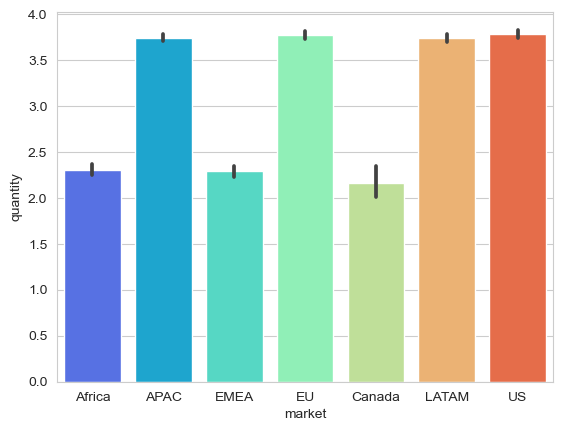

In [19]:
sns.set_style('whitegrid')
sns.barplot(x='market',y = 'quantity',data=df, palette='rainbow')


## Which are the Top 10 country by sales ##

In [20]:
df.groupby('country').agg({'sales':sum}).sort_values('sales',ascending= False).head(10)

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


## Which are the average shipping cost for top 10 different countries ##

In [21]:
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


In [24]:
date = df.groupby('year').sum()
date

,sales,quantity,discount,profit,shipping_cost
year,,,,,
2011,2.259451e+06,31443,1333.394,248940.81154,244270.34550
2012,2.677439e+06,38111,1548.774,307415.27910,283490.82400
2013,3.405746e+06,48136,1935.522,408512.76018,364548.74436
2014,4.299866e+06,60622,2512.038,504165.97046,460505.78954


## Total sales chart by the year ##

(array([0, 1, 2, 3]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014')])

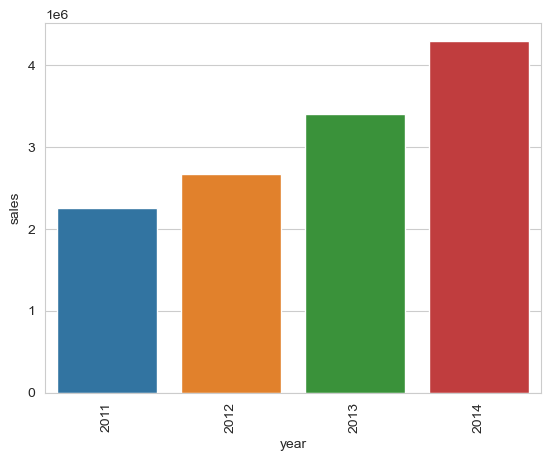

In [25]:
sns.barplot(x='year',y='sales',data=date.reset_index())
plt.xticks(rotation = 'vertical')
